<a href="https://colab.research.google.com/github/DhanvinS/Projects/blob/main/An%20Analysis%20of%20all%20models/Decision_Trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
dataset = files.upload()

Saving heart-disease-classification.csv to heart-disease-classification (1).csv


In [ ]:
import pandas as pd
heart_disease_df = pd.read_csv('heart-disease-classification.csv')
heart_disease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# for age
def age_category(age):
  if age > 55:
    return 'Older'
  elif age > 40:
    return 'Mid'
  else:
    return 'Young'


#for Resting BP
def restingBP_category(bp):
  if bp > 140:
    return 'High'
  elif bp >120:
    return 'Normal'
  else:
    return 'Low'


# for cholestrol
def cholestrol_category(cl):
  if cl > 200:
    return 'High'
  else:
    return 'Normal'


# for MaxHR
def MaxHR_category(mhr):
  if mhr > 165:
    return 'High'
  elif mhr >140:
    return 'Normal'
  else:
    return 'Low'

In [ ]:
# applying these functions to our dataset

heart_disease_df['Age_cat'] = heart_disease_df['Age'].apply(age_category)
heart_disease_df['RestingBP_cat'] = heart_disease_df['RestingBP'].apply(restingBP_category)
heart_disease_df['Cholestrol_cat'] = heart_disease_df['Cholesterol'].apply(cholestrol_category)
heart_disease_df['MaxHR_cat'] = heart_disease_df['MaxHR'].apply(MaxHR_category)

heart_disease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat,RestingBP_cat,Cholestrol_cat,MaxHR_cat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Young,Normal,High,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid,High,Normal,Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Young,Normal,High,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Mid,Normal,High,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Mid,High,Normal,Low


In [ ]:
# dropping the old non categorised columns

heart_disease_df = heart_disease_df.drop(columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR'])
heart_disease_df.tail()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat,RestingBP_cat,Cholestrol_cat,MaxHR_cat
913,M,TA,0,Normal,N,1.2,Flat,1,Mid,Low,High,Low
914,M,ASY,1,Normal,N,3.4,Flat,1,Older,High,Normal,Normal
915,M,ASY,0,Normal,Y,1.2,Flat,1,Older,Normal,Normal,Low
916,F,ATA,0,LVH,N,0.0,Flat,1,Older,Normal,High,High
917,M,NAP,0,Normal,N,0.0,Up,0,Young,Normal,Normal,High


In [ ]:
heart_disease_df.to_csv('HeartDiseaseData.csv', index = False)

In [ ]:
df = pd.read_csv('HeartDiseaseData.csv')
df.tail()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_cat,RestingBP_cat,Cholestrol_cat,MaxHR_cat
913,M,TA,0,Normal,N,1.2,Flat,1,Mid,Low,High,Low
914,M,ASY,1,Normal,N,3.4,Flat,1,Older,High,Normal,Normal
915,M,ASY,0,Normal,Y,1.2,Flat,1,Older,Normal,Normal,Low
916,F,ATA,0,LVH,N,0.0,Flat,1,Older,Normal,High,High
917,M,NAP,0,Normal,N,0.0,Up,0,Young,Normal,Normal,High


In [ ]:
# All required import statements

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Assigning x to all our attribute columns and y to out target column

x = df.drop(columns = ['HeartDisease'])
y = df['HeartDisease']

In [ ]:
x_encoded = pd.get_dummies(x)
x_encoded.head()

,FastingBS,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,...,Age_cat_Older,Age_cat_Young,RestingBP_cat_High,RestingBP_cat_Low,RestingBP_cat_Normal,Cholestrol_cat_High,Cholestrol_cat_Normal,MaxHR_cat_High,MaxHR_cat_Low,MaxHR_cat_Normal
0,0,0.0,False,True,False,True,False,False,False,True,...,False,True,False,False,True,True,False,True,False,False
1,0,1.0,True,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,True
2,0,0.0,False,True,False,True,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False
3,0,1.5,True,False,True,False,False,False,False,True,...,False,False,False,False,True,True,False,False,True,False
4,0,0.0,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
# Im Dropping the first category of each variable to avoid redundancy ("dummy variable trap")
x_encoded = x_encoded.drop(
    columns=[
        'Sex_F',        # Drop one of Sex
        'Age_cat_Young',     # Drop one of Age_cat
        'RestingBP_cat_Low', # Drop one of RestingBP_cat
        'Cholestrol_cat_Normal', # Drop one of Cholesterol_cat
        'MaxHR_cat_Low'      # Drop one of MaxHR_cat
    ]
)
x_encoded.head()


,FastingBS,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_cat_Mid,Age_cat_Older,RestingBP_cat_High,RestingBP_cat_Normal,Cholestrol_cat_High,MaxHR_cat_High,MaxHR_cat_Normal
0,0,0.0,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,True,True,False
1,0,1.0,False,False,False,True,False,False,True,False,...,False,True,False,True,False,True,False,False,False,True
2,0,0.0,True,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
3,0,1.5,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,True,True,False,False
4,0,0.0,True,False,False,True,False,False,True,False,...,False,False,True,True,False,True,False,False,False,False


In [ ]:
# function for models

def evaluate_models(min_samples_split):
  #storing all iterations of accuracies in this
  dt_accuracies = []
  rf_accuracies = []

  for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(
        x_encoded, y, test_size = 0.25, random_state = i
    )

    # Decision Tree
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split)
    dt.fit(x_train, y_train)
    y_predicted_dt = dt.predict(x_test)
    dt_accuracies.append(accuracy_score(y_test, y_predicted_dt))

    # Random Forest
    rf = RandomForestClassifier(n_estimators=250, min_samples_split = min_samples_split)
    rf.fit(x_train, y_train)
    y_predicted_rf = rf.predict(x_test)
    rf_accuracies.append(accuracy_score(y_test, y_predicted_rf))

  avg_dt = np.mean(dt_accuracies)
  avg_rf = np.mean(rf_accuracies)

  return avg_dt, avg_rf, dt_accuracies, rf_accuracies


In [ ]:
# First experiment (min_samples_split=200)
avg_dt_200, avg_rf_200, dt_acc_list_200, rf_acc_list_200 = evaluate_models(200)

In [ ]:
avg_dt_10, avg_rf_10, dt_acc_list_10, rf_acc_list_10 = evaluate_models(10)

In [ ]:
print("Average Decision Tree accuracy (min_samples_split=200):", avg_dt_200)
print("Average Random Forest accuracy (min_samples_split=200):", avg_rf_200)
print("Average Decision Tree accuracy (min_samples_split=10):", avg_dt_10)
print("Average Random Forest accuracy (min_samples_split=10):", avg_rf_10)

Average Decision Tree accuracy (min_samples_split=200): 0.7960869565217391
Average Random Forest accuracy (min_samples_split=200): 0.8393478260869566
Average Decision Tree accuracy (min_samples_split=10): 0.8093478260869565
Average Random Forest accuracy (min_samples_split=10): 0.8641304347826088


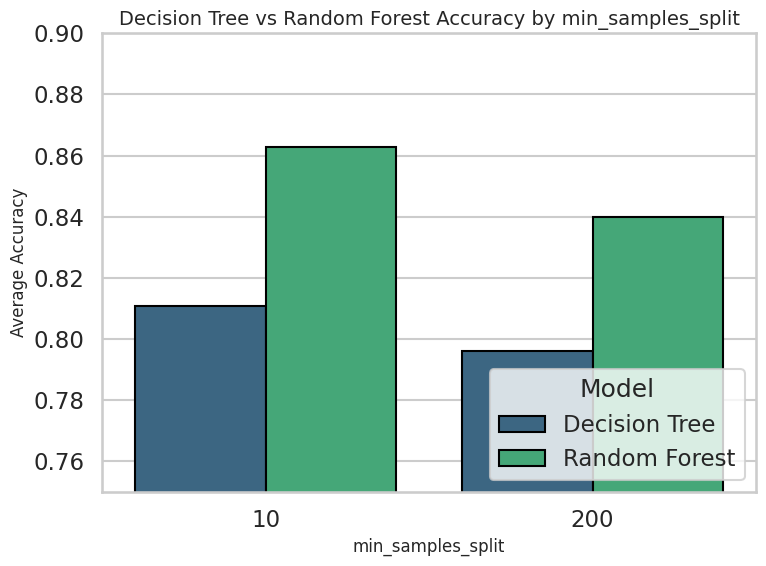

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for visualization
data = pd.DataFrame({
    'min_samples_split': [200, 200, 10, 10],
    'Model': ['Decision Tree', 'Random Forest', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.7961, 0.8398, 0.8107, 0.8628]
})

# Set style for Seaborn
sns.set(style="whitegrid", context="talk")

# Create the grouped bar plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=data,
    x='min_samples_split',
    y='Accuracy',
    hue='Model',
    palette='viridis',
    edgecolor='black'
)

# Customize the plot
plt.title('Decision Tree vs Random Forest Accuracy by min_samples_split', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=12)
plt.xlabel('min_samples_split', fontsize=12)
plt.ylim(0.75, 0.9)
plt.legend(title='Model', loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()
